In [988]:
#import libraries
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [989]:
#data extraction
df=pd.read_csv('listings_updated.csv')
df.head()

,id,host_id,host_name,name,neighbourhood,RATING,RATING_FINAL,BEDROOM_FINAL,BED-FINAL,BEDROOM,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138592.0,648553,Julie & Brad,Home in San Francisco,Noe Valley,4.91,4.91,4 bedroom,4 bed,4 bedroom,...,Entire home/apt,1250,5,34,18-08-2023,0.23,1,80,2,Pending Application
1,474107.0,2318089,Inés,Home in San Francisco,Excelsior,4.91,4.91,2 bedroom,2 bed,2 bedroom,...,Private room,79,2,149,14-11-2023,1.92,1,196,20,STR-0007772
2,487019.0,2410550,Cecile,Rental unit in San Francisco,Potrero Hill,4.53,4.53,3 bedroom,4 bed,3 bedroom,...,Entire home/apt,249,5,36,18-07-2023,0.26,1,202,7,STR-0001599
3,487499.0,1682183,Daniel,Rental unit in San Francisco,Mission,4.78,4.78,1 bedroom,1 bed,1 bedroom,...,Entire home/apt,125,30,196,04-11-2023,1.41,1,149,4,NaN
4,1163946.0,1918239,Jen,Condo in San Francisco,Mission,2 bedroom,0.00,2 bedroom,2 bed,2 bed,...,Entire home/apt,70,30,2,07-10-2016,0.02,1,0,0,NaN


In [990]:
#drop duplicate columns
df = df.drop('RATING', axis=1)
df = df.drop('BEDROOM', axis=1)
df = df.drop('bed', axis=1)
df = df.drop('BATH', axis=1)

#rename columns
df.rename(columns={'RATING_FINAL':'rating'},inplace=True)
df.rename(columns={'BEDROOM_FINAL':'bedroom'},inplace=True)
df.rename(columns={'BED-FINAL':'beds'},inplace=True)
df.rename(columns={'BATH FINAL':'bathroom'},inplace=True)
df.head()

,id,host_id,host_name,name,neighbourhood,rating,bedroom,beds,bathroom,latitude,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138592.0,648553,Julie & Brad,Home in San Francisco,Noe Valley,4.91,4 bedroom,4 bed,2 bath,37.75635,...,Entire home/apt,1250,5,34,18-08-2023,0.23,1,80,2,Pending Application
1,474107.0,2318089,Inés,Home in San Francisco,Excelsior,4.91,2 bedroom,2 bed,1 shared bath,37.72369,...,Private room,79,2,149,14-11-2023,1.92,1,196,20,STR-0007772
2,487019.0,2410550,Cecile,Rental unit in San Francisco,Potrero Hill,4.53,3 bedroom,4 bed,2 bath,37.75622,...,Entire home/apt,249,5,36,18-07-2023,0.26,1,202,7,STR-0001599
3,487499.0,1682183,Daniel,Rental unit in San Francisco,Mission,4.78,1 bedroom,1 bed,1 bath,37.75884,...,Entire home/apt,125,30,196,04-11-2023,1.41,1,149,4,NaN
4,1163946.0,1918239,Jen,Condo in San Francisco,Mission,0.00,2 bedroom,2 bed,1 bath,37.76111,...,Entire home/apt,70,30,2,07-10-2016,0.02,1,0,0,NaN


In [991]:
#missing values
df.isna().sum()

id                                   0
host_id                              0
host_name                            1
name                                 0
neighbourhood                        0
rating                               0
bedroom                              0
beds                                 0
bathroom                             0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1884
reviews_per_month                 1884
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2965
dtype: int64

In [992]:
#handling missing values
df.last_review.fillna(method="ffill",inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'license':'Not Updated/No liscence'}, inplace=True)
df.dropna(inplace=True)

df.isna().sum()

id                                0
host_id                           0
host_name                         0
name                              0
neighbourhood                     0
rating                            0
bedroom                           0
beds                              0
bathroom                          0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [993]:
#label encoding
label_encoder = LabelEncoder()
df['room_type_encoded']=label_encoder.fit_transform(df['room_type'])
print(df['room_type'].value_counts())
print(df['room_type_encoded'].value_counts())

room_type
Entire home/apt    4981
Private room       2948
Shared room          68
Hotel room           58
Name: count, dtype: int64
room_type_encoded
0    4981
2    2948
3      68
1      58
Name: count, dtype: int64


In [994]:
#label encoding
df['neighbourhood_encoded']=label_encoder.fit_transform(df['neighbourhood'])
print(df['neighbourhood'].value_counts())
print(df['neighbourhood_encoded'].value_counts())

neighbourhood
Downtown/Civic Center    1010
Western Addition          690
Mission                   661
South of Market           558
Nob Hill                  488
Outer Sunset              360
Bernal Heights            332
Castro/Upper Market       312
Haight Ashbury            299
Noe Valley                262
Marina                    223
Inner Richmond            206
Outer Richmond            197
Financial District        193
Russian Hill              185
Bayview                   179
Pacific Heights           176
North Beach               174
Excelsior                 171
Potrero Hill              170
Inner Sunset              169
Parkside                  157
Chinatown                 139
Ocean View                128
Outer Mission             125
West of Twin Peaks        104
Visitacion Valley          84
Lakeshore                  67
Glen Park                  61
Twin Peaks                 60
Crocker Amazon             45
Presidio Heights           30
Diamond Heights           

In [995]:
#data cleaning
df['bedroom']=df['bedroom'].str.replace('bedroom','')
df['bedroom']=df['bedroom'].str.replace('Studio','0')
df['bedroom']=df['bedroom'].str.replace(' ','')
df['beds']=df['beds'].str.replace('bed','')


In [996]:
#adding new cols
df['bathroom'] = df['bathroom'].astype(str)

# Extract numerical values from 'bath' column
df['num_bathroom'] = df['bathroom'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

df.loc[df['bathroom'].str.contains('shared|half'), 'num_bathroom'] = 0
df['num_bathroom'] = df['num_bathroom'].fillna(0).astype(int)

# Add a new column 'is_private_bath' with 1 for private bath and 0 for shared/half bath
df['is_private_bathroom'] = ~df['bathroom'].str.contains('shared|half', case=False).astype(int)
df['is_private_bathroom'].replace(-2, 0, inplace=True)
df['is_private_bathroom'].replace(-1, 1, inplace=True)

df = df.drop('bathroom', axis=1)
df.head()

,id,host_id,host_name,name,neighbourhood,rating,bedroom,beds,latitude,longitude,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type_encoded,neighbourhood_encoded,num_bathroom,is_private_bathroom
0,138592.0,648553,Julie & Brad,Home in San Francisco,Noe Valley,4.91,4,4,37.75635,-122.42864,...,18-08-2023,0.23,1,80,2,Pending Application,0,18,2,1
1,474107.0,2318089,Inés,Home in San Francisco,Excelsior,4.91,2,2,37.72369,-122.42865,...,14-11-2023,1.92,1,196,20,STR-0007772,2,7,0,0
2,487019.0,2410550,Cecile,Rental unit in San Francisco,Potrero Hill,4.53,3,4,37.75622,-122.39821,...,18-07-2023,0.26,1,202,7,STR-0001599,0,26,2,1
3,487499.0,1682183,Daniel,Rental unit in San Francisco,Mission,4.78,1,1,37.75884,-122.42232,...,04-11-2023,1.41,1,149,4,Not Updated/No liscence,0,16,1,1
4,1163946.0,1918239,Jen,Condo in San Francisco,Mission,0.00,2,2,37.76111,-122.42082,...,07-10-2016,0.02,1,0,0,Not Updated/No liscence,0,16,1,1


In [997]:
#checking data types
df.dtypes

id                                float64
host_id                             int64
host_name                          object
name                               object
neighbourhood                      object
rating                            float64
bedroom                            object
beds                               object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
room_type_encoded                   int32
neighbourhood_encoded               int32
num_bathroom                        int32
is_private_bathroom               

In [998]:
#correcting data types
df['bedroom']=df['bedroom'].astype('int')
df['beds']=df['beds'].astype('int')
df['room_type_encoded']=df['room_type_encoded'].astype('int')
df['reviews_per_month']=df['reviews_per_month'].astype('int')
df.dtypes

id                                float64
host_id                             int64
host_name                          object
name                               object
neighbourhood                      object
rating                            float64
bedroom                             int32
beds                                int32
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                   int32
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
room_type_encoded                   int32
neighbourhood_encoded               int32
num_bathroom                        int32
is_private_bathroom               

In [999]:
df.columns

Index(['id', 'host_id', 'host_name', 'name', 'neighbourhood', 'rating',
       'bedroom', 'beds', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license',
       'room_type_encoded', 'neighbourhood_encoded', 'num_bathroom',
       'is_private_bathroom'],
      dtype='object')

In [1000]:
#value counts for each col
index=['id', 'host_id', 'host_name', 'name', 'neighbourhood', 'rating',
       'bedroom', 'beds', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'num_bathroom', 'is_private_bathroom']

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

id
8.086380e+17    11
7.840150e+17     9
8.086210e+17     9
8.086220e+17     7
7.840130e+17     7
                ..
2.810560e+07     1
2.808599e+07     1
2.808173e+07     1
2.807441e+07     1
1.037700e+18     1
Name: count, Length: 7718, dtype: int64 

---------------------------------------------------------------
host_id
542041520    249
107434423    164
4430421      155
520931919    148
173206762     61
            ... 
169948922      1
29535485       1
28190541       1
156365053      1
161769990      1
Name: count, Length: 3967, dtype: int64 

---------------------------------------------------------------
host_name
Allen         251
Blueground    164
Chris         158
Landmark      155
Michael       120
             ... 
Christiaan      1
Inés            1
Kameh           1
Gabrielle       1
Nazanina        1
Name: count, Length: 2153, dtype: int64 

---------------------------------------------------------------
name
Rental unit in San Francisco                   2650
Home in Sa

In [1001]:
#categorical data handling
categorical_col = []
numerical_col=[]
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int32" and df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)
print(f"Numerical Col: {numerical_col}")
print(f"Categorical Col: {categorical_col}")

Numerical Col: ['id', 'host_id', 'rating', 'bedroom', 'beds', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'room_type_encoded', 'neighbourhood_encoded', 'num_bathroom', 'is_private_bathroom']
Categorical Col: ['host_name', 'name', 'neighbourhood', 'room_type', 'last_review', 'license']


In [1002]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
   
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        outlier_list.extend(outlier_list_column)
        

    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

# Creating function for scaling
def Standard_Scaler (df, col_names):
    """
    Takes a dataframe,column names and scaled dataframe.
    """
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [1003]:
Outliers_IQR = IQR_method(df,1,numerical_col)

# dropping outliers
df1 = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)
df.shape

Total number of deleted outliers: 1127


(8055, 24)

In [1004]:
#stat summary
df.describe()

,id,host_id,rating,bedroom,beds,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_encoded,neighbourhood_encoded,num_bathroom,is_private_bathroom
count,8.055000e+03,8.055000e+03,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000
mean,3.093048e+17,1.478846e+08,2.992223,1.387213,1.760397,37.769007,-122.430098,392.096710,20.612539,47.043824,0.724146,23.934078,177.621477,9.262570,0.764494,17.012415,1.071260,0.860087
std,4.133539e+17,1.780713e+08,2.336953,1.041436,1.175001,0.023130,0.027096,2182.891277,48.646240,98.824562,1.599876,54.420559,136.039850,19.335322,0.981214,10.624706,0.706764,0.346918
min,9.580000e+02,1.169000e+03,0.000000,0.000000,0.000000,37.708480,-122.512460,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.172707e+07,6.998119e+06,0.000000,1.000000,1.000000,37.753888,-122.442360,95.000000,2.000000,1.000000,0.000000,1.000000,33.000000,0.000000,0.000000,6.000000,1.000000,1.000000
50%,4.500046e+07,5.578278e+07,4.680000,1.000000,1.000000,37.774214,-122.422380,145.000000,3.000000,7.000000,0.000000,3.000000,176.000000,1.000000,0.000000,16.000000,1.000000,1.000000
75%,7.630695e+17,2.635022e+08,4.920000,2.000000,2.000000,37.787865,-122.411020,249.000000,30.000000,44.000000,1.000000,12.000000,317.500000,8.000000,2.000000,25.000000,1.000000,1.000000
max,1.037700e+18,5.490278e+08,5.000000,15.000000,12.000000,37.809810,-122.358480,50000.000000,1125.000000,1134.000000,35.000000,249.000000,365.000000,426.000000,3.000000,35.000000,10.000000,1.000000


In [1005]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8055 entries, 0 to 8055
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8055 non-null   float64
 1   host_id                         8055 non-null   int64  
 2   host_name                       8055 non-null   object 
 3   name                            8055 non-null   object 
 4   neighbourhood                   8055 non-null   object 
 5   rating                          8055 non-null   float64
 6   bedroom                         8055 non-null   int32  
 7   beds                            8055 non-null   int32  
 8   latitude                        8055 non-null   float64
 9   longitude                       8055 non-null   float64
 10  room_type                       8055 non-null   object 
 11  price                           8055 non-null   int64  
 12  minimum_nights                  8055 no

In [1006]:
#checking top host listing count
top_host_check=df.calculated_host_listings_count.max()
top_host_check

249

In [1007]:
#analysis - top reviewed
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,host_id,host_name,name,neighbourhood,rating,bedroom,beds,latitude,longitude,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,room_type_encoded,neighbourhood_encoded,num_bathroom,is_private_bathroom
3118,35642179.0,265029065,Grant Plaza,Boutique hotel in San Francisco,Financial District,4.25,1,1,37.79035,-122.40619,...,03-12-2023,21,3,0,300,License not needed per OSTR,1,8,1,1
183,545685.0,2676602,Su,Guest suite in San Francisco,Outer Richmond,4.82,1,1,37.77502,-122.48035,...,30-11-2023,7,2,114,93,STR-0004160,0,22,1,1
192,585326.0,2676602,Su,Guest suite in San Francisco,Outer Richmond,4.80,1,2,37.77547,-122.48116,...,29-11-2023,7,2,0,99,STR-0004160,0,22,1,1
714,4464347.0,22931450,Sarah,Bed and breakfast in San Francisco,North Beach,4.75,1,8,37.79821,-122.40521,...,30-11-2023,8,4,298,354,933345,3,19,0,0
1041,8356380.0,44046204,Cheryl,Guesthouse in San Francisco,Crocker Amazon,4.94,1,1,37.71329,-122.43633,...,01-12-2023,9,1,164,119,STR-0000771,0,4,1,1
1449,14804950.0,24949158,Angela,Guest suite in San Francisco,Bernal Heights,4.89,0,1,37.74486,-122.41814,...,26-11-2023,9,1,62,113,STR-0002030,0,1,1,1
16,8739.0,7149,Ivan & Wendy,Condo in San Francisco,Mission,4.92,1,1,37.76030,-122.42197,...,12-11-2023,4,2,0,44,STR-0000028,2,16,1,1
1389,13845578.0,9194713,Lance,Guest suite in San Francisco,Visitacion Valley,4.93,1,1,37.71907,-122.40276,...,26-11-2023,8,6,0,134,STR-0005709,0,33,1,1
1078,9051149.0,47224934,Elmer,Rental unit in San Francisco,Western Addition,4.93,1,1,37.77133,-122.43612,...,26-11-2023,7,1,301,60,STR-0001444,2,35,0,0
1169,10469182.0,34963239,Landy,Home in San Francisco,Outer Richmond,4.92,1,1,37.78028,-122.50252,...,22-11-2023,8,3,147,114,STR-0002581,0,22,1,1


In [1008]:
#avg price
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 101.2


<Axes: xlabel='num_bathroom', ylabel='Density'>

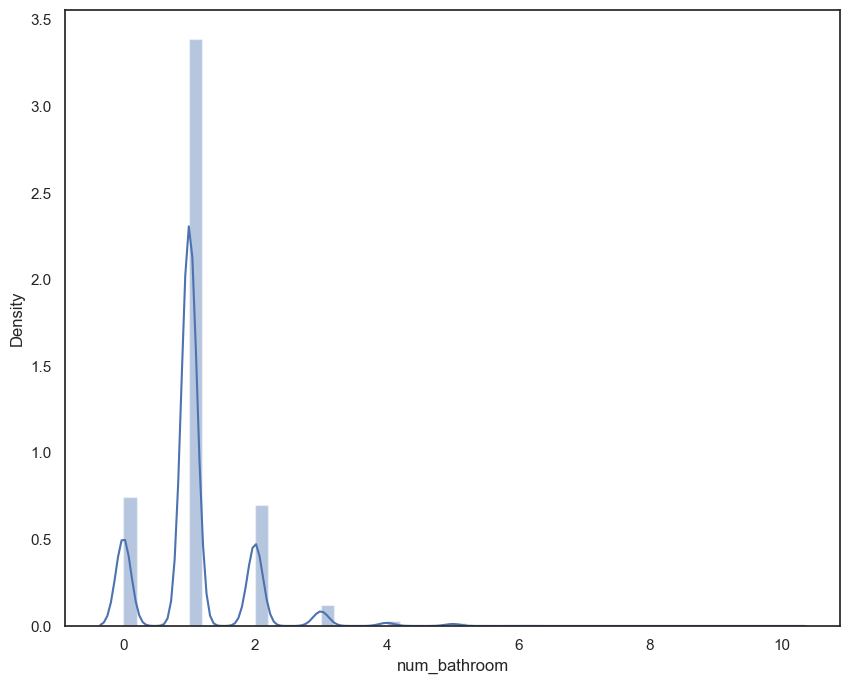

In [1009]:
#data vizualtion
sns.distplot(df["num_bathroom"])

(1.0, 5.5)

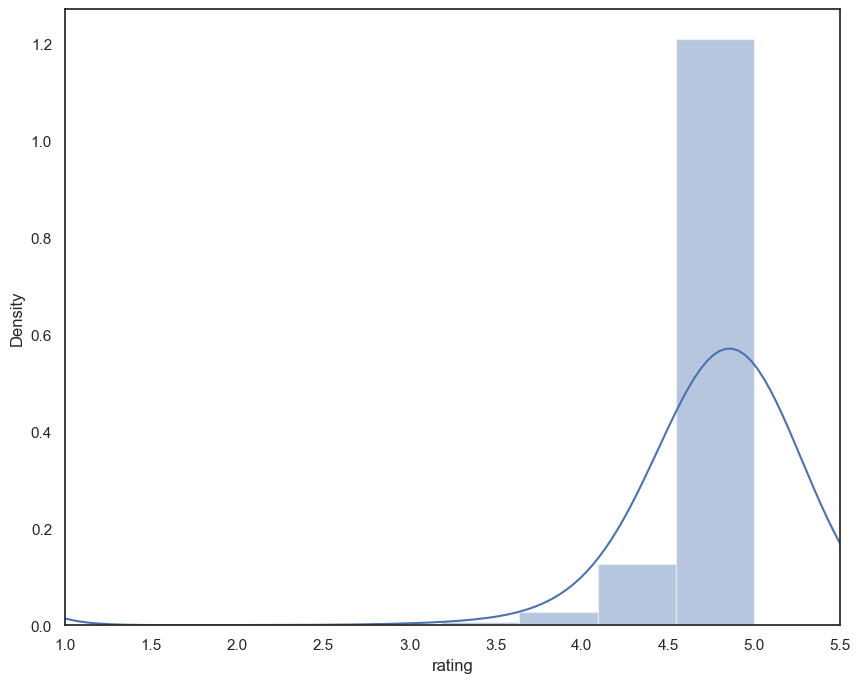

In [1010]:
sns.distplot(df["rating"])
plt.xlim(1,5.5)

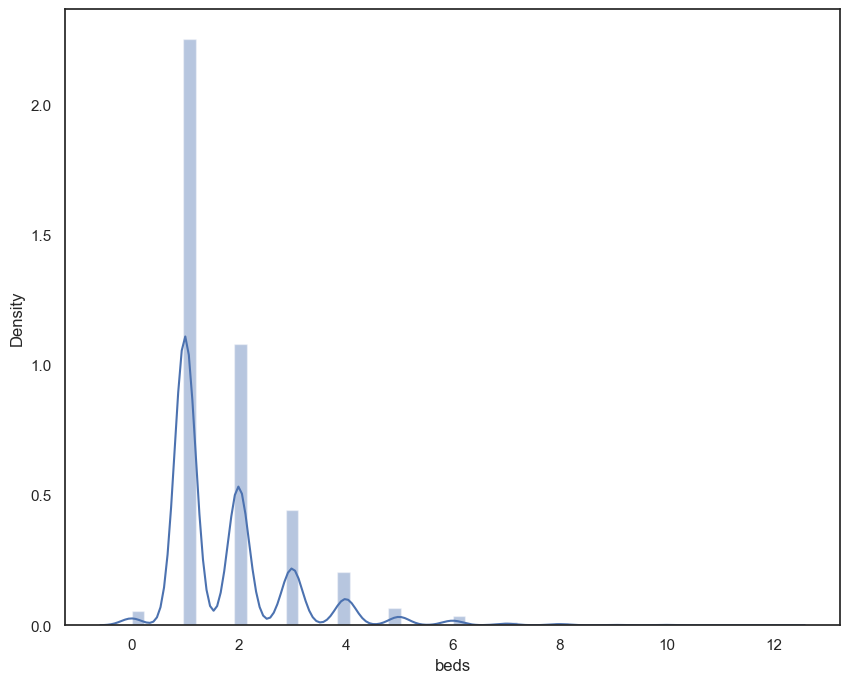

In [1011]:
sns.distplot(df["beds"])
plt.show()

In [1012]:
#plot  functions
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)

def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    a = list(df[h].unique())
    b =list(df[h].value_counts())
    ax.pie(b, labels = a,autopct='%1.2f%%')
    plt.show()

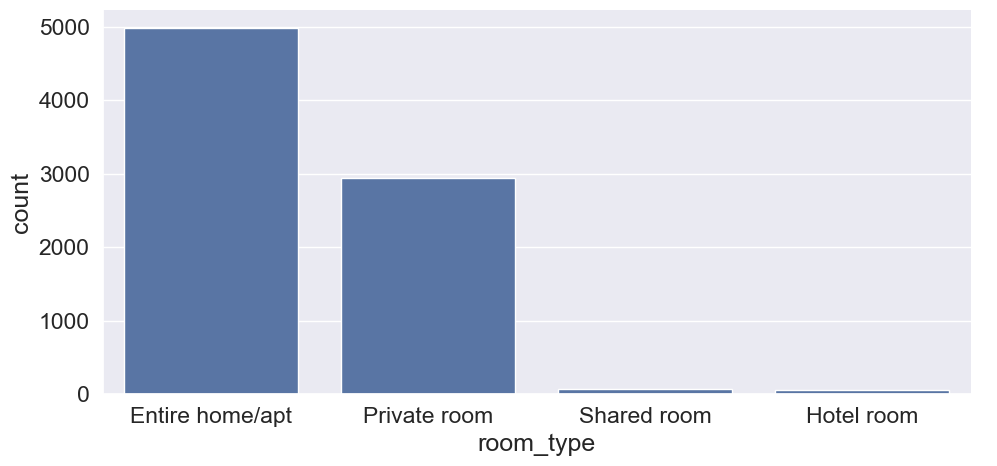

In [1013]:
plot_catplot("room_type", "count", 5, 2)

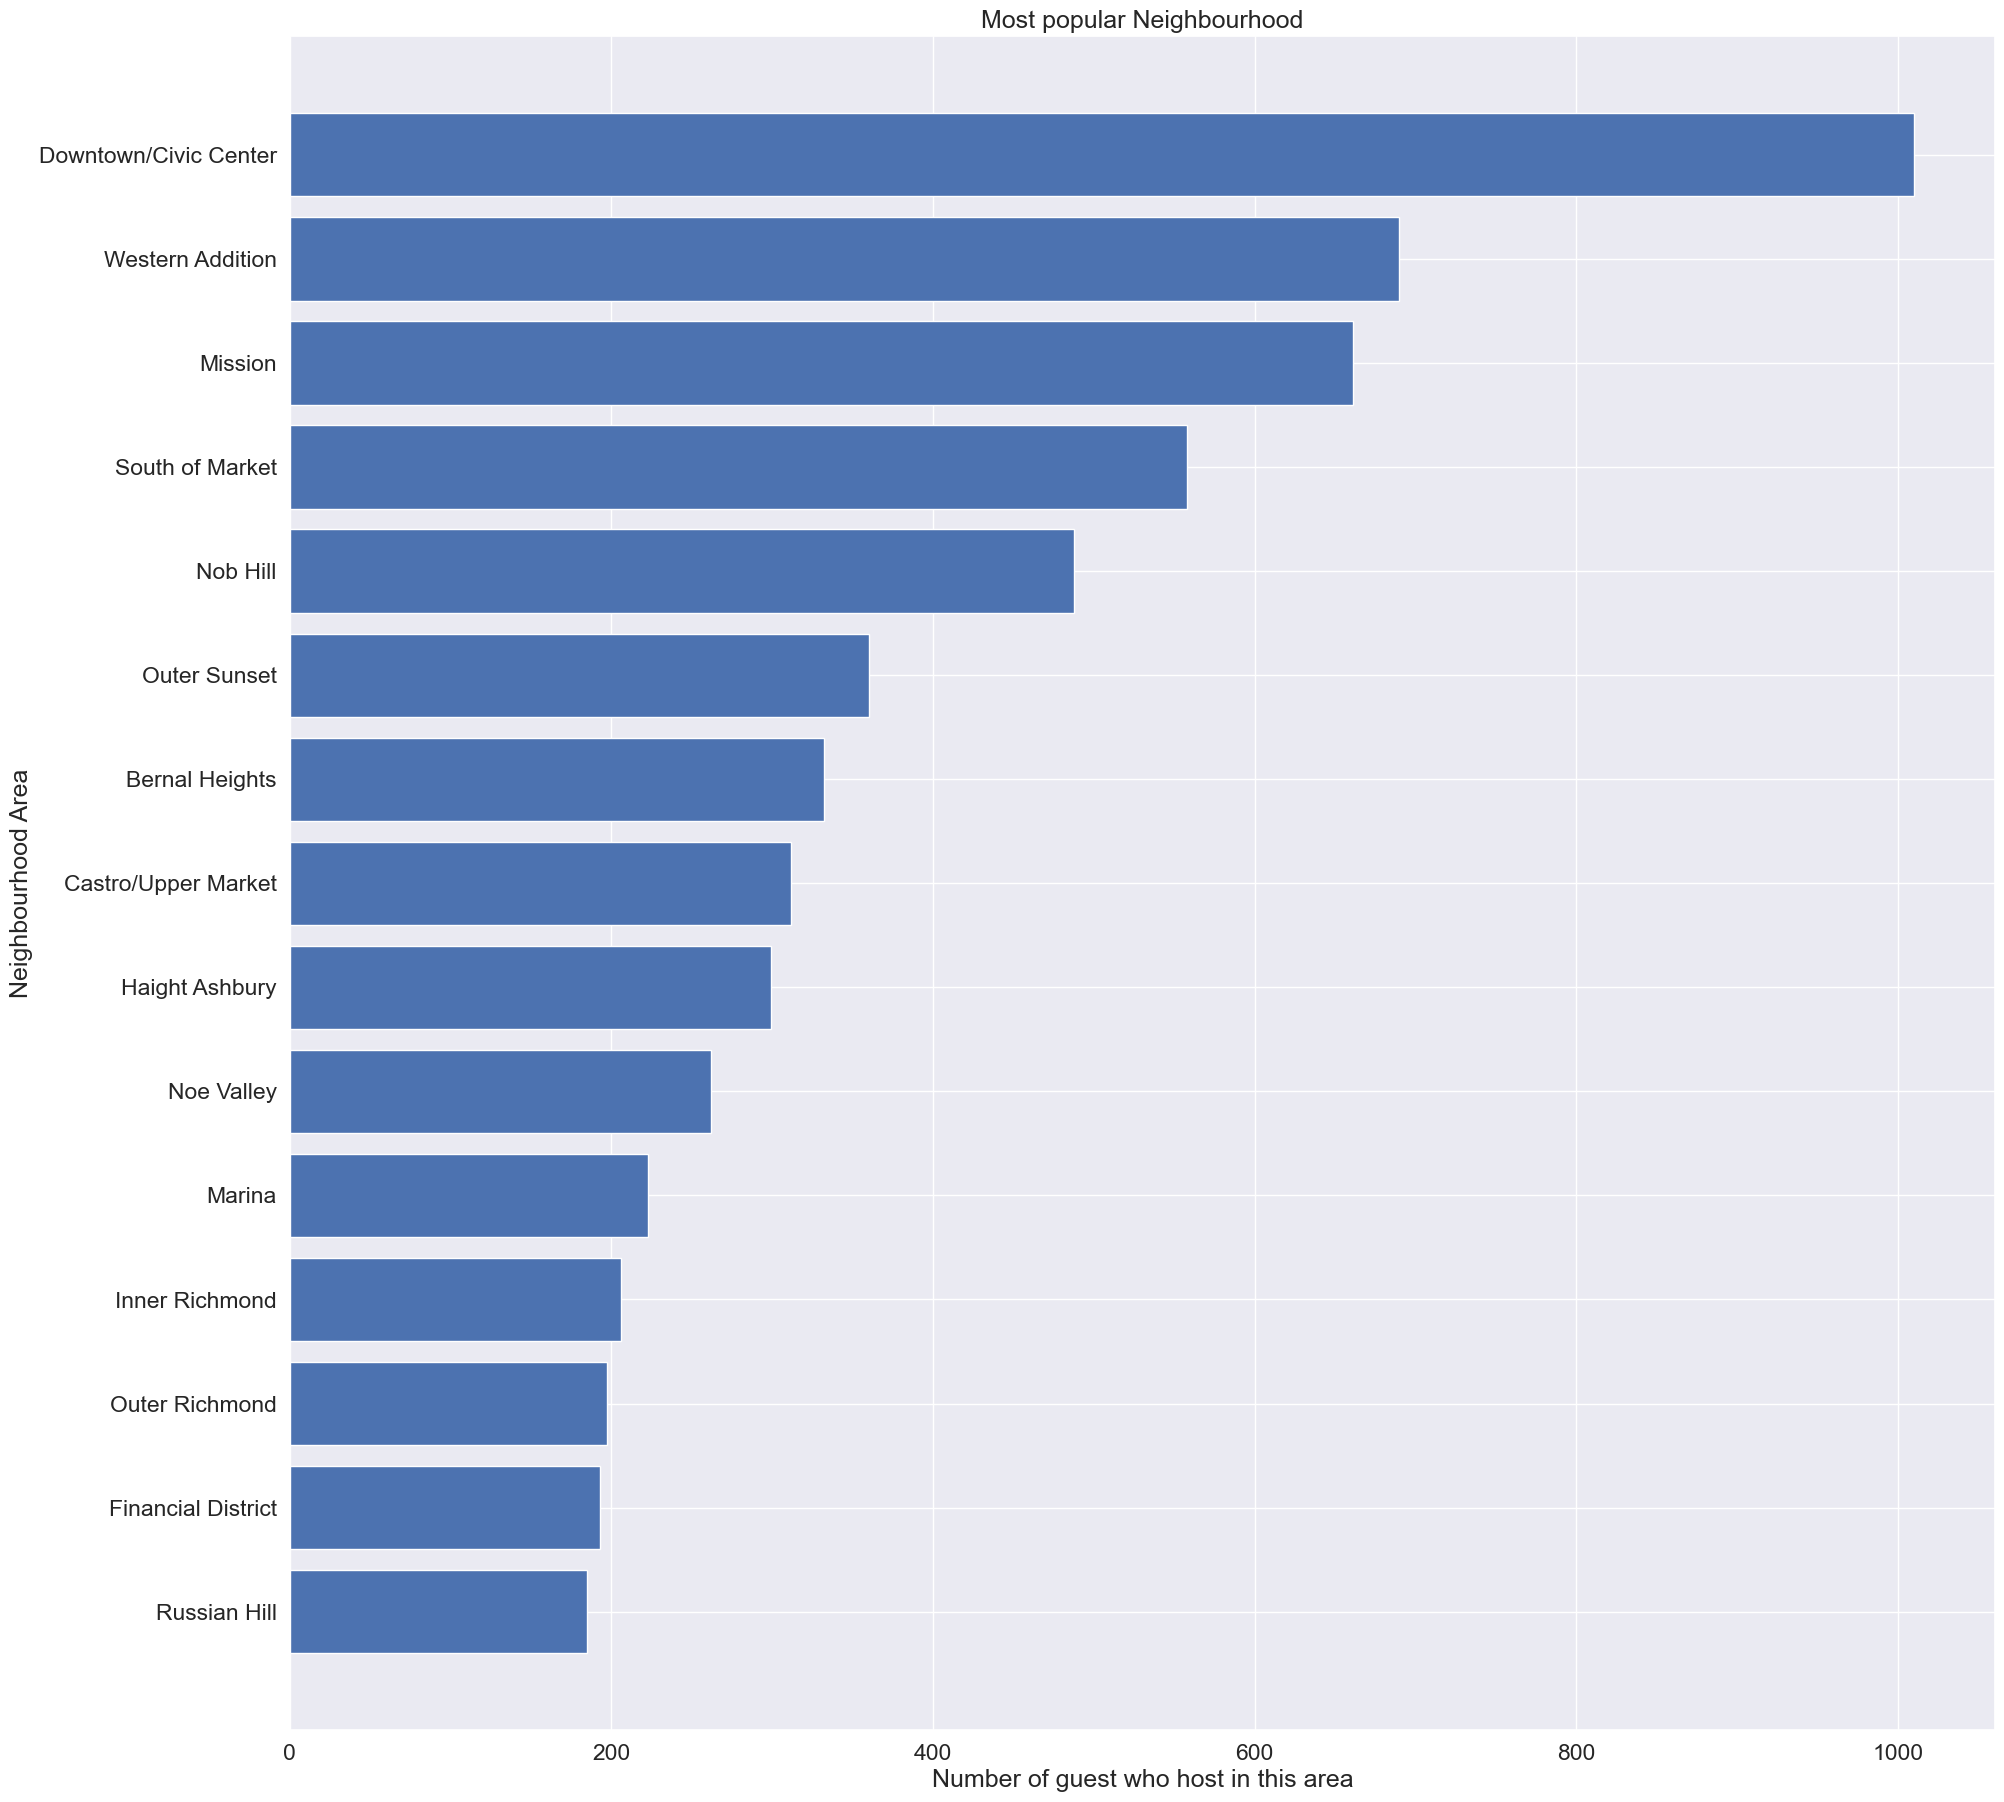

In [1014]:
#plotting most popular neighbourhood
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

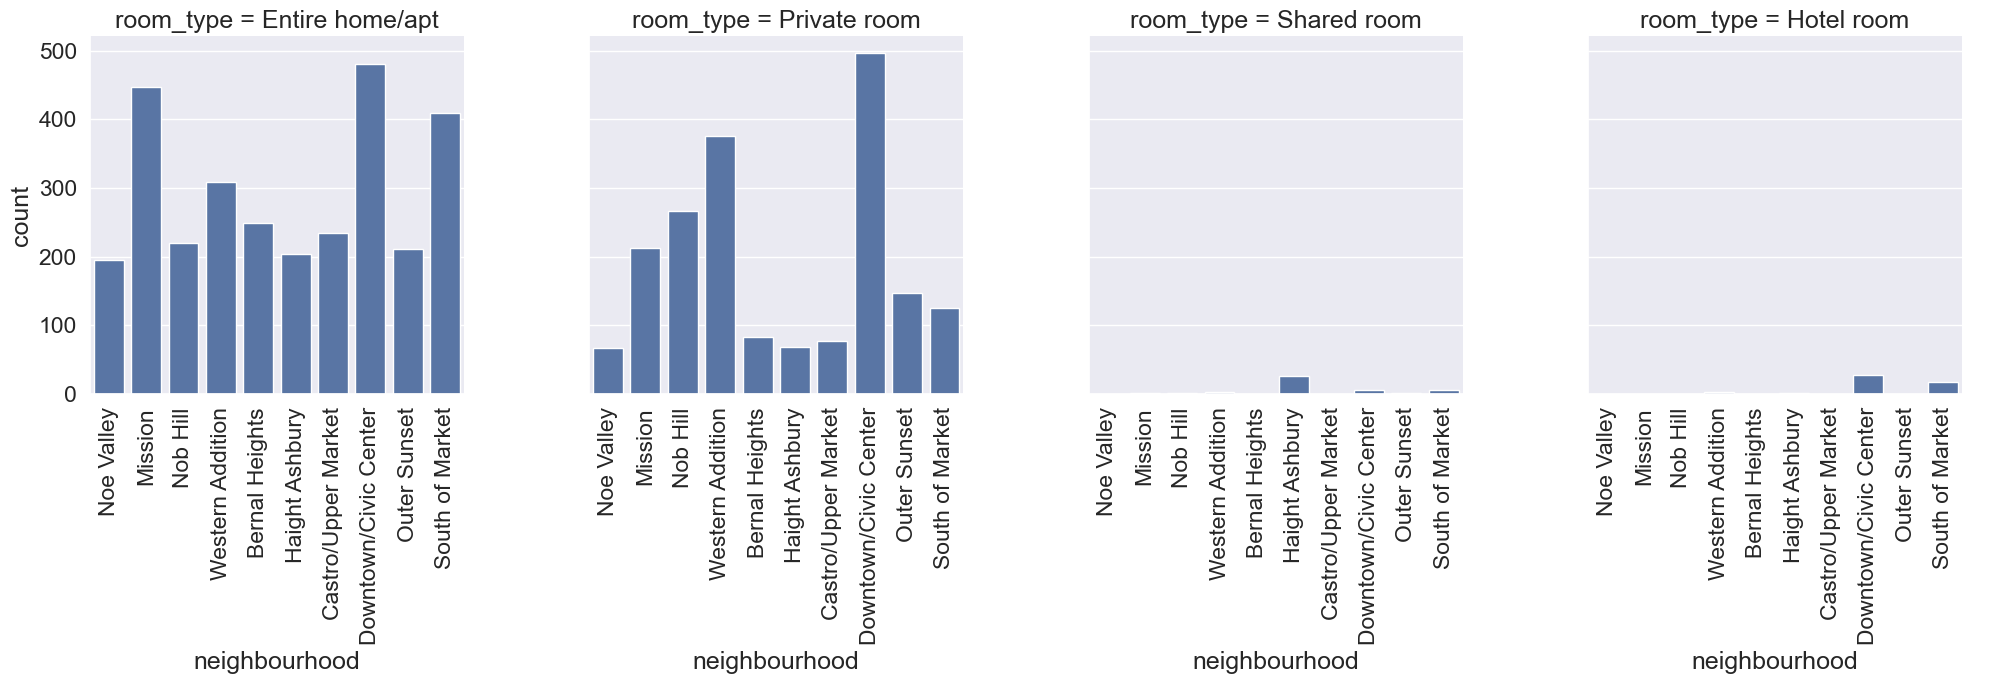

In [1015]:
sub=df.loc[df['neighbourhood'].isin(['Downtown/Civic Center','Western Addition','Mission','South of Market', 'Nob Hill', 'Outer Sunset', 'Bernal Heights', 'Castro/Upper Market','Haight Ashbury','Noe Valley'])]

#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', col='room_type', data=sub, kind='count')
viz_3.set_xticklabels(rotation=90)

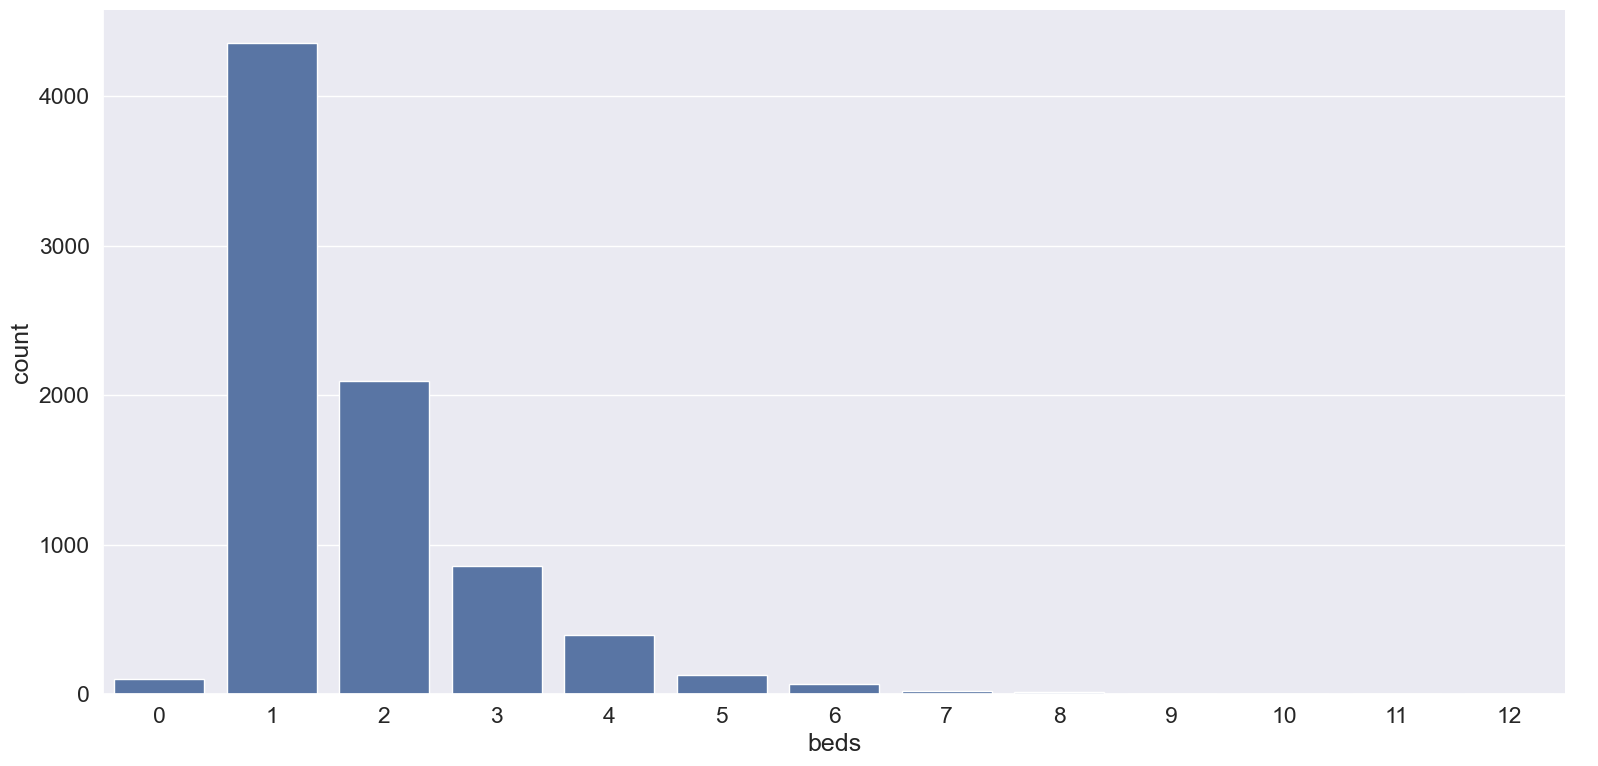

In [1016]:
#beds column plot
plot_catplot("beds","count",8, 2)

In [1017]:
#top hosts
top_host=df['host_name'].value_counts().head(10)
top_host.head()

host_name
Allen         251
Blueground    164
Chris         158
Landmark      155
Michael       120
Name: count, dtype: int64

In [1018]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df

,host_name,count
0,Allen,251
1,Blueground,164
2,Chris,158
3,Landmark,155
4,Michael,120
5,David,96
6,Jennifer,65
7,Jan,63
8,Michelle,61
9,Stratford,61


[Text(0, 0, 'Allen'),
 Text(1, 0, 'Blueground'),
 Text(2, 0, 'Chris'),
 Text(3, 0, 'Landmark'),
 Text(4, 0, 'Michael'),
 Text(5, 0, 'David'),
 Text(6, 0, 'Jennifer'),
 Text(7, 0, 'Jan'),
 Text(8, 0, 'Michelle'),
 Text(9, 0, 'Stratford')]

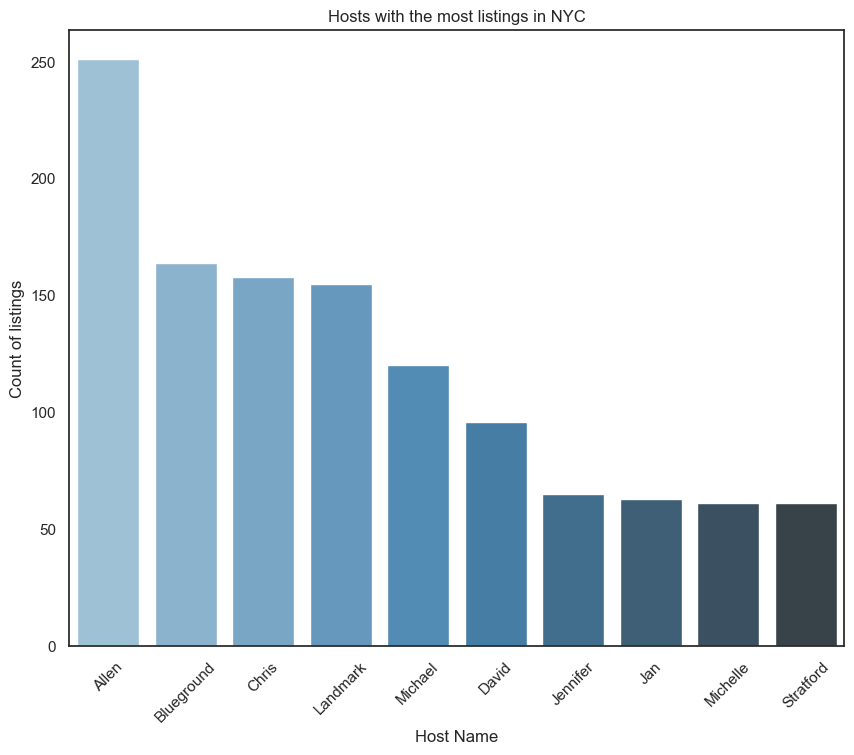

In [1019]:
#top host viz
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
viz_1=sns.barplot(x="host_name", y="count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host Name')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

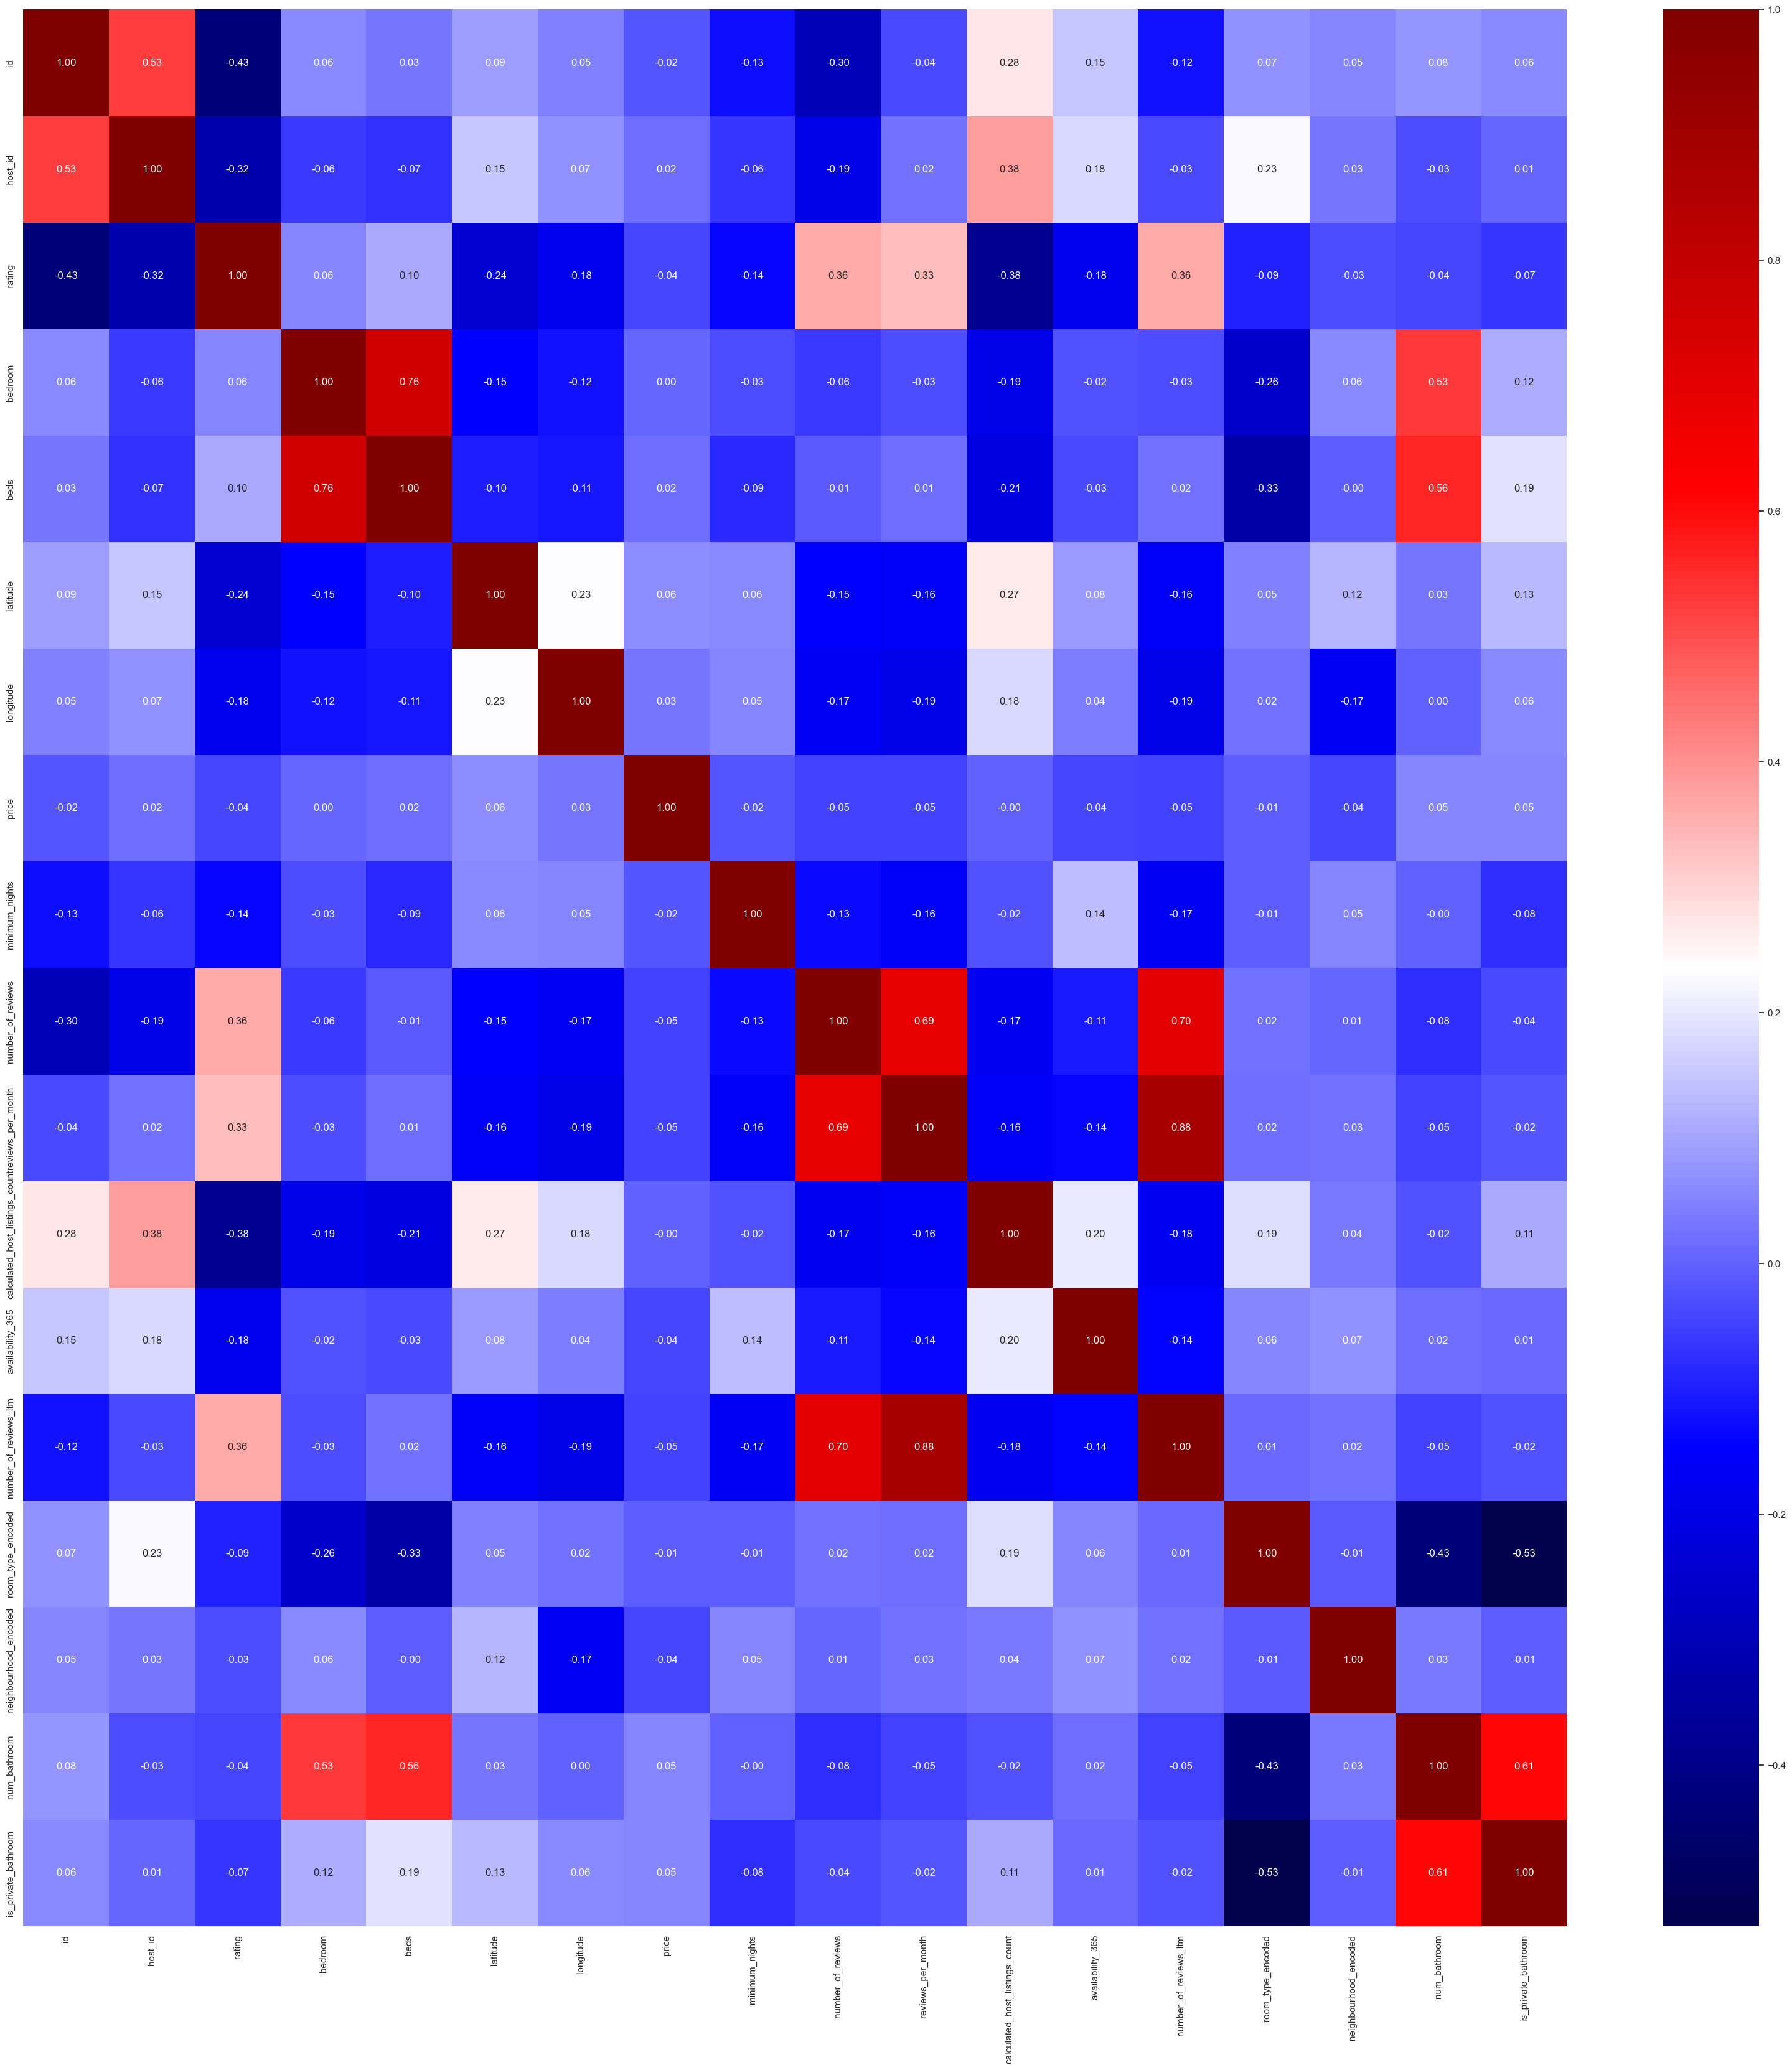

In [1020]:
#heatmap for corr
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])
plt.figure(figsize = (40,40))
sns.heatmap(df[numerical_col].corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [1021]:
df.columns

Index(['id', 'host_id', 'host_name', 'name', 'neighbourhood', 'rating',
       'bedroom', 'beds', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license',
       'room_type_encoded', 'neighbourhood_encoded', 'num_bathroom',
       'is_private_bathroom'],
      dtype='object')

In [1022]:
#columns affecting price
columns_affecting_price = [
    'bedroom', 'beds', 'room_type_encoded', 'neighbourhood_encoded',
    'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'number_of_reviews_ltm', 'num_bathroom', 'is_private_bathroom'
]

In [1023]:
#x,y split for training models
x = df[columns_affecting_price]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [1024]:
#model functions
def Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred):
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    # Calculating cross-validated R-squared
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2')
    CV_R2 = cv_score.mean()
    
    return [r2, adjusted_r2, CV_R2, RMSE]

In [1025]:
#Linear Regression
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

ndf = [Reg_Models_Evaluation_Metrics(lr, X_train, y_train, X_test, y_test, y_pred_lr)]
lm_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])
lm_score.insert(0, 'Model', 'Linear')
lm_score.head()


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear,0.013901,0.006496,0.005014,1648.137986


In [1026]:
#RandomForest regressor
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

ndf = [Reg_Models_Evaluation_Metrics(rf, X_train, y_train, X_test, y_test, y_pred_rf)]
rf_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])
rf_score.insert(0, 'Model', 'RandomForeset')
rf_score.head()

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,RandomForeset,0.73455,0.732557,0.482247,855.114703


In [1027]:
#Polynomial Regressoion
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

print(f"Best Params:{poly_tuned.best_params_}")

y_pred_poly = poly_tuned.predict(x_test)

ndf = [Reg_Models_Evaluation_Metrics(poly_tuned, X_train, y_train, X_test, y_test, y_pred_poly)]
poly_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])
poly_score.insert(0, 'Model', 'Polynomial')
poly_score.head()

Best Params:{'poly__degree': 2, 'ridge__alpha': 2.0}


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Polynomial,-0.027577,-0.035294,0.012566,1682.443664


In [1028]:
#CatBoost Regressor
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

y_pred_cbr = model_CBR.predict(x_test)

ndf = [Reg_Models_Evaluation_Metrics(model_CBR, X_train, y_train, X_test, y_test, y_pred_cbr)]
cbr_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])
cbr_score.insert(0, 'Model', 'CatBoost')
cbr_score.head()

Learning rate set to 0.054957
0:	learn: 2236.4326970	total: 5ms	remaining: 4.99s
1:	learn: 2168.8891082	total: 8.98ms	remaining: 4.48s
2:	learn: 2098.7594253	total: 13.2ms	remaining: 4.39s
3:	learn: 2049.5573971	total: 20.9ms	remaining: 5.21s
4:	learn: 1986.6945294	total: 27ms	remaining: 5.38s
5:	learn: 1929.9460214	total: 31.2ms	remaining: 5.17s
6:	learn: 1877.6840212	total: 35.4ms	remaining: 5.02s
7:	learn: 1835.4038797	total: 40.7ms	remaining: 5.05s
8:	learn: 1788.1353692	total: 44.9ms	remaining: 4.94s
9:	learn: 1742.6431948	total: 48.8ms	remaining: 4.83s
10:	learn: 1730.9871878	total: 53.1ms	remaining: 4.77s
11:	learn: 1685.0314197	total: 57.4ms	remaining: 4.73s
12:	learn: 1672.9939715	total: 61.5ms	remaining: 4.67s
13:	learn: 1633.7405533	total: 67.7ms	remaining: 4.77s
14:	learn: 1595.1512622	total: 71.9ms	remaining: 4.72s
15:	learn: 1559.2138106	total: 76.6ms	remaining: 4.71s
16:	learn: 1548.8924329	total: 80.7ms	remaining: 4.67s
17:	learn: 1539.5769147	total: 87.7ms	remaining: 4

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,CatBoost,0.714898,0.712757,0.543807,886.203854


In [1029]:
#GradientBoosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

ndf = [Reg_Models_Evaluation_Metrics(gb, X_train, y_train, X_test, y_test, y_pred_gb)]
gb_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])
gb_score.insert(0, 'Model', 'GradientBoosting')
gb_score.head()

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,GradientBoosting,0.79571,0.794176,0.300962,750.164677


In [1030]:
#XGB Regressor
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

ndf = [Reg_Models_Evaluation_Metrics(xgb, X_train, y_train, X_test, y_test, y_pred_xgb)]
xgb_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])
xgb_score.insert(0, 'Model', 'XGB Regressor')
xgb_score.head()

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGB Regressor,0.511072,0.5074,0.788313,1160.528246


In [1031]:
#prediction evaluation metrics dataframe
predictions = pd.concat([lm_score, rf_score, poly_score, cbr_score, gb_score,xgb_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear,0.013901,0.006496,0.005014,1648.137986
1,RandomForeset,0.734550,0.732557,0.482247,855.114703
2,Polynomial,-0.027577,-0.035294,0.012566,1682.443664
3,CatBoost,0.714898,0.712757,0.543807,886.203854
4,GradientBoosting,0.795710,0.794176,0.300962,750.164677
5,XGB Regressor,0.511072,0.507400,0.788313,1160.528246


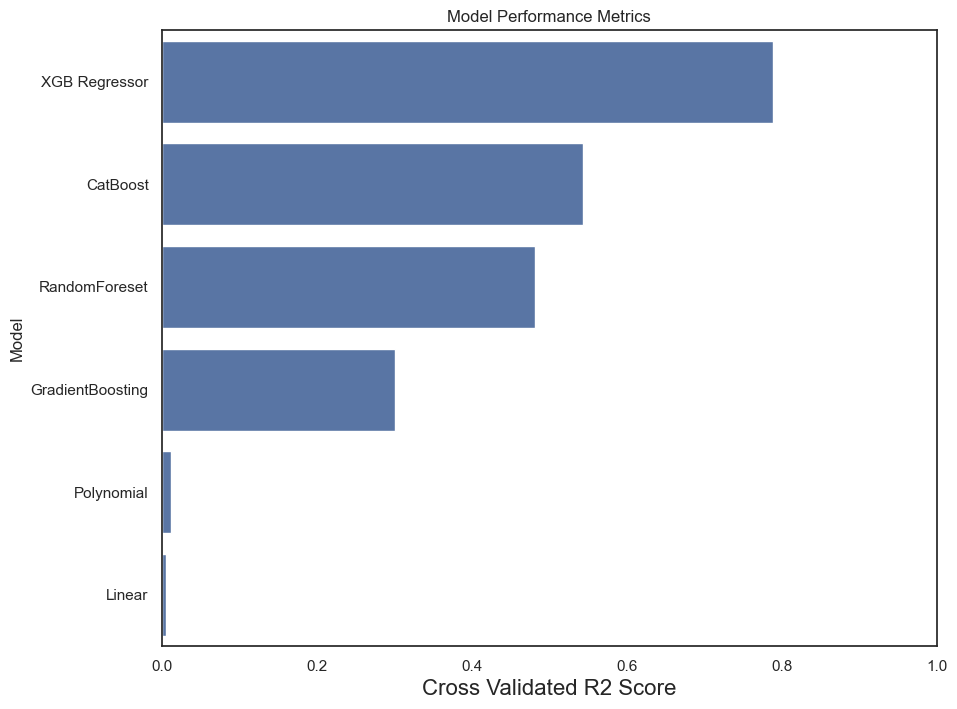

In [1035]:
# Model Performance Metrics Visualization
predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data=predictions)
plt.xlabel('Cross Validated R2 Score', size=16)
plt.ylabel('Model')
plt.xlim(0, 1.0)
plt.title('Model Performance Metrics')

plt.show()